In [10]:
import json
from datasets import load_dataset
from nomic import atlas
import pandas as pd
import numpy as np
import re

# Y Combinator

In [ ]:
# link to yc.csv:
# https://docs.google.com/spreadsheets/u/0/d/181GQmXflgMCCI9awLbzK4Zf0uneQBKoh51wBjNTc8Us/htmlview?pli=1#
ycdf = pd.read_csv("yc.csv")
tags_strings = [
    None
    if pd.isna(x)
    else ''.join(x.split(","))
    for x in ycdf.Tags
]
ycdf["oneliner_then_tags"] = [f"{x} {y}" for x, y in zip(ycdf['One line'], tags_strings)]
ycdf["tags_then_oneliner"] = [f"{y} {x}" for x, y in zip(ycdf['One line'], tags_strings)]
ycdf['Year'] = ycdf['Batch'].apply(lambda x: 2000 + int(x[1:]) if not pd.isna(x) and x[0] in {'W', 'S'} else None)
seasons = {"S": "Spring", "W": "Winter", "IK": "Imagine K-12"}
ycdf['Season'] = ycdf['Batch'].apply(
    lambda x: seasons[''.join([char for char in x if not char.isdigit()])] 
    if not pd.isna(x) 
    else None
)
ycdf = ycdf.replace({np.nan: "", "nan None" : "", "None nan": ""})
ycdf.to_csv("ycdf.csv", index=False)

# Art Institute of Chicago API

In [ ]:
#!/bin/bash

# total_items=10000
# per_page=100
# pages=$((total_items / per_page))

# (
# echo '['
# for page in $(seq 0 $((pages - 1))); do
#   if [ $page -gt 0 ]; then
#     echo ','
#   fi
#   curl -s "https://api.artic.edu/api/v1/artworks?fields=id,title,image_id,artist_display,date_display,medium_display,dimensions,credit_line,is_public_domain,department_title,artwork_type_title&limit=$per_page&page=$((page + 1))" | 
#   jq '.data[] | select(.image_id != null) | {
#     id: .id,
#     title: .title,
#     image_url: "https://www.artic.edu/iiif/2/\(.image_id)/full/843,/0/default.jpg",
#     artist: .artist_display,
#     date: .date_display,
#     medium: .medium_display,
#     dimensions: .dimensions,
#     credit_line: .credit_line,
#     is_public_domain: .is_public_domain,
#     department: .department_title,
#     artwork_type: .artwork_type_title
#   }' | jq -c '.'
# done
# echo ']'
# ) > artworks.json

In [41]:
with open("artworks.json", "r") as f:
    data = json.load(f)
year_regex = r'\b\d{4}\b'
metadata = [{k: v for k, v in item.items() if k != 'image_url'} for item in data]
urls = [x['image_url'] for x in data]
final_metadata = []
final_urls = []
for x, url in zip(metadata, urls):
    raw_date = x['date']
    try:
        match = re.search(year_regex, raw_date)
        if match:
            x['date'] = int(match.group())
            if x['date'] < 2025:
                final_metadata.append(x)
                final_urls.append(url)
    except Exception as e:
        print(str(e)[:100])
len(final_metadata), len(final_urls)

expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object


In [3]:
atlas.map_data(
    data=final_metadata,
    blobs=final_urls,
    identifier='Art Institute of Chicago',
    description='Spanning from 1000 to the 2020s, this collection from the Art Institue of Chicago contains beauty across a variety of styles, cultures, and media. Downloaded September 2024 using the Art Institute of Chicago API.',
    id_field='id'
)

# ArtBench

In [1]:
ds = load_dataset("alfredplpl/artbench-pd-256x256")
atlas.map_data(
    data=pd.DataFrame(
        ds['train'].remove_columns(['image'])
    ),
    blobs=ds['train']['image']
)

2024-09-08 12:25:27.172 | WARNING  | nomic.atlas:map_data:128 - An ID field was not specified in your data so one was generated for you in insertion order.
2024-09-08 12:25:29.266 | INFO     | nomic.dataset:_create_project:857 - Creating dataset `experimental-wiles`
2024-09-08 12:25:29.681 | INFO     | nomic.atlas:map_data:140 - Uploading data to Atlas.
Loading images: 100%|██████████████████████████████████| 46298/46298 [00:48<00:00, 953.44it/s]
Uploading blobs to Atlas: 46308it [18:43, 41.21it/s]                                          
2024-09-08 12:45:02.191 | INFO     | nomic.atlas:map_data:158 - `nomic/experimental-wiles`: Data upload succeeded to dataset`
2024-09-08 12:45:02.518 | WARNING  | nomic.dataset:create_index:1100 - Ignoring indexed_field for image datasets. Only _blob_hash is supported.
2024-09-08 12:45:03.846 | INFO     | nomic.dataset:create_index:1262 - Created map `experimental-wiles` in dataset `nomic/experimental-wiles`: https://atlas.nomic.ai/data/nomic/experim

AtlasDataset: <{'id': '09343f25-c05d-4587-901b-ec18069cc510', 'owner': '6e59bf43-f579-46ef-a144-ec130ce2652e', 'project_name': 'experimental-wiles', 'creator': 'google-oauth2|116194022103103208403', 'description': '', 'is_public': True, 'is_public_to_org': True, 'project_fields': ['caption', 'caption_jp', 'artist', 'url', 'id_', '_blob_hash'], 'unique_id_field': 'id_', 'modality': 'image', 'total_datums_in_project': 46298, 'created_timestamp': '2024-09-08T16:25:29.002782+00:00', 'slug': 'experimental-wiles', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/09343f25-c05d-4587-901b-ec18069cc510/og-map.png', 'atlas_indices': [{'id': '63d74486-da43-4e74-a7be-98d2fc2e4153', 'project_id': '09343f25-c05d-4587-901b-ec18069cc510', 'index_name': 'experimental-wiles', 'indexed_field': '_blob_hash', 'created_timestamp': '2024-09-08T16:45:03.151074+00:00', 'updated_timestamp': '2024-09-08T16:45:03.151074+00:00', 'atoms': ['charchunk', 'document'], 'colorable_fields': ['caption', 'caption_jp', 'artist', 'url'], 'embedders': [{'id': 'c8257658-0be3-4046-9afd-990ff564f61c', 'atlas_index_id': '63d74486-da43-4e74-a7be-98d2fc2e4153', 'ready': False, 'model_name': 'nomic-embed-vision-v1.5', 'hyperparameters': {'norm': 'both', 'batch_size': 20, 'polymerize_by': 'charchunk', 'dataset_buffer_size': 1000}}], 'nearest_neighbor_indices': [{'id': 'c432b4df-a022-4e97-89d9-bc1a25167112', 'index_name': 'NomicOrganize', 'ready': False, 'hyperparameters': {'M': 16, 'space': 'l2', 'ef_construction': 100}, 'atom_strategies': ['document']}], 'projections': [{'id': 'c9d7f0bd-364f-4d6f-a32e-2710636eddaf', 'projection_name': 'NomicProject', 'ready': False, 'hyperparameters': {'rho': 0.1, 'model': 'nomic-project-v2', 'spread': 1, 'n_noise': None, 'min_dist': 0.4, 'n_epochs': 50, 'n_neighbors': 15, 'n_init_epochs': 20, 'local_neighborhood_size': 64}, 'atom_strategies': ['document'], 'created_timestamp': '2024-09-08T16:45:03.168113+00:00', 'updated_timestamp': '2024-09-08T16:45:03.168113+00:00', 'thumbnail': 'https://atlas-content-production.s3.amazonaws.com/projects/09343f25-c05d-4587-901b-ec18069cc510/c9d7f0bd-364f-4d6f-a32e-2710636eddaf/map.png', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/09343f25-c05d-4587-901b-ec18069cc510/c9d7f0bd-364f-4d6f-a32e-2710636eddaf/og-map.png'}]}], 'insert_update_delete_lock': True, 'access_role': 'ADMIN', 'permissions': {'dataset:administration:read': True, 'dataset:administration:write': True, 'dataset:metadata:read': True, 'dataset:metadata:write': True, 'dataset:data:read': True, 'dataset:data:write': True, 'dataset:data:add_data': True, 'dataset:resource:create': True, 'dataset:data:delete_data': True, 'dataset:resource:delete': True, 'dataset:members:read': True, 'dataset:members:write': True, 'dataset:tags:read': True, 'dataset:tags:write': True}, 'schema': '/////7ABAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAGAAAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAAA0AAAABAAAACQAAAAwOTM0M2YyNS1jMDVkLTQ1ODctOTAxYi1lYzE4MDY5Y2M1MTAAAAAACgAAAHByb2plY3RfaWQAAAYAAADwAAAAsAAAAIQAAABcAAAANAAAAAQAAAA4////AAABBRAAAAAcAAAABAAAAAAAAAAKAAAAX2Jsb2JfaGFzaAAALP///2T///8AAAEFEAAAABQAAAAEAAAAAAAAAAMAAABpZF8AUP///4j///8AAAEFEAAAABQAAAAEAAAAAAAAAAMAAAB1cmwAdP///6z///8AAAEFEAAAABgAAAAEAAAAAAAAAAYAAABhcnRpc3QAAJz////U////AAABBRAAAAAcAAAABAAAAAAAAAAKAAAAY2FwdGlvbl9qcAAAyP///xAAFAAIAAYABwAMAAAAEAAQAAAAAAABBRAAAAAcAAAABAAAAAAAAAAHAAAAY2FwdGlvbgAEAAQABAAAAAAAAAA=', 'organization_slug': 'nomic', 'organization_name': 'Nomic', 'creator_nickname': 'max6', 'creator_picture': 'https://lh3.googleusercontent.com/a/ACg8ocJKxBMlt_PLxGbbQzq2Dk2EBTuhRW6eWCEFD6CrMR6hHjspEw=s96-c'}>

# Cats and dogs

In [6]:
from datasets import load_dataset
from nomic.atlas import map_data
ds = load_dataset("Bingsu/Cat_and_Dog")
map_data(
	blobs=ds['train']['image'],
	data=[{"animal" : {0: "cat", 1: "dog"}[x]} for x in ds['train']['labels']]
)

# Uniform Distribution puzzle: (u1*u2)^u3 ~ U

In [7]:
import matplotlib.pyplot as plt
from nomic.atlas import map_data
import numpy as np
import pandas as pd

In [8]:
u1 = np.random.uniform(size=10000)
u2 = np.random.uniform(size=10000)
u3 = np.random.uniform(size=10000)
product = u1*u2
result = product**u3

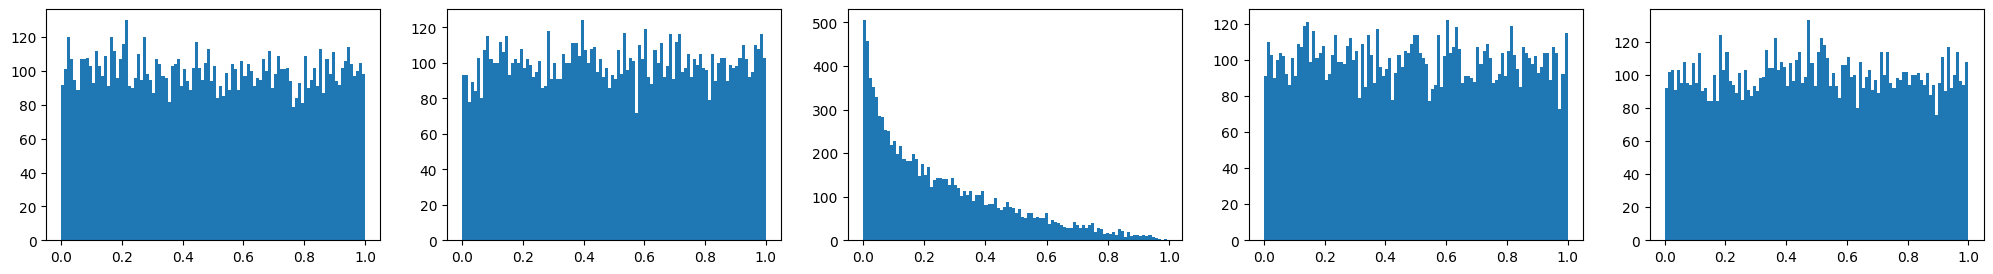

In [9]:
fig, ax = plt.subplots(1, 5, figsize=(25,3))
ax[0].hist(u1, bins=100)
ax[1].hist(u2, bins=100)
ax[2].hist(product, bins=100)
ax[3].hist(u3, bins=100)
ax[4].hist(result, bins=100)
plt.show()

In [10]:
df = pd.DataFrame({
    "U1": u1,
    "U2": u2,
    "U3": u3,
    "U1*U2": product,
    "(U1*U2)^U3": result,
    "log(U1)": np.log(u1),
    "log(U2)": np.log(u2),
    "log(U3)": np.log(u3),
    "log(U1*U2)": np.log(u1) + np.log(u2),
    "log((U1*U2)^U3)": u3*np.log(u1) + u3*np.log(u2),
    "placeholder": ["float" for _ in range(len(u1))]
})
# map_data(data=df, indexed_field="placeholder", identifier="Uniform", description="https://x.com/3blue1brown/status/1833534452187664468")

2024-09-16 21:19:45.430 | WARNING  | nomic.atlas:map_data:128 - An ID field was not specified in your data so one was generated for you in insertion order.
2024-09-16 21:19:47.650 | INFO     | nomic.dataset:_create_project:852 - Creating dataset `uniform`
2024-09-16 21:19:47.936 | INFO     | nomic.atlas:map_data:140 - Uploading data to Atlas.
  0%|                                                     | 0/2 [00:00<?, ?it/s]2024-09-16 21:19:48.674 | ERROR    | nomic.dataset:_add_data:1607 - Shard upload failed: {"detail":"Uploading 5000 more datapoints exceeds your organization limit of 250000 datapoints across all of your organization's datasets. Upgrade your plan at atlas.nomic.ai or contact support@nomic.ai."}
2024-09-16 21:19:48.745 | ERROR    | nomic.dataset:_add_data:1607 - Shard upload failed: {"detail":"Uploading 5000 more datapoints exceeds your organization limit of 250000 datapoints across all of your organization's datasets. Upgrade your plan at atlas.nomic.ai or contact suppo

Exception: Your dataset has 0 datapoints. Datasets must have at least 20 datapoints to index!

# Hairstyles over the years

In [ ]:
!pip install us

In [8]:
import geopandas as gpd
from shapely.geometry import Point
import random
import requests
import zipfile
import io
from typing import Tuple
import us

us_states = [str(x) for x in us.STATES]
# Global variable to cache the states GeoDataFrame
_states_gdf = None

def get_rand_coord(state: str) -> Tuple[float, float]:
    """
    Generates a random latitude and longitude coordinate within the specified U.S. state.

    Parameters:
    - state (str): The name of the U.S. state (e.g., 'California').

    Returns:
    - Tuple[float, float]: A tuple containing the latitude and longitude.
    """
    global _states_gdf

    if _states_gdf is None:
        # Download the shapefile from the U.S. Census Bureau
        shapefile_url = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip"
        print("Downloading U.S. states shapefile...")
        response = requests.get(shapefile_url)
        if response.status_code != 200:
            raise ConnectionError(f"Failed to download shapefile. Status code: {response.status_code}")

        with zipfile.ZipFile(io.BytesIO(response.content)) as z:
            z.extractall("us_states_shapefile")

        # Load the shapefile into a GeoDataFrame
        shapefile_path = "us_states_shapefile/cb_2018_us_state_20m.shp"
        _states_gdf = gpd.read_file(shapefile_path)

        # Optionally, filter out territories and keep only the 50 states plus DC
        exclude_states = ["Puerto Rico", "American Samoa", "Guam", "Commonwealth of the Northern Mariana Islands", "United States Virgin Islands"]
        _states_gdf = _states_gdf[~_states_gdf['NAME'].isin(exclude_states)]

        print("Shapefile loaded successfully.")

    # Standardize the state name (case-insensitive)
    state = state.strip().title()

    # Find the state in the GeoDataFrame
    state_row = _states_gdf[_states_gdf['NAME'] == state]

    if state_row.empty:
        raise ValueError(f"State '{state}' not found. Please check the state name.")

    # Get the geometry of the state
    state_geom = state_row.iloc[0].geometry

    # Get the bounding box of the state
    minx, miny, maxx, maxy = state_geom.bounds

    # Function to generate a random point within the bounding box
    def generate_random_point():
        random_lon = random.uniform(minx, maxx)
        random_lat = random.uniform(miny, maxy)
        return Point(random_lon, random_lat)

    # Attempt to find a random point within the state geometry
    max_attempts = 1000
    for attempt in range(max_attempts):
        point = generate_random_point()
        if state_geom.contains(point):
            return (point.y, point.x)  # (latitude, longitude)

    # If a point was not found after max_attempts, raise an error
    raise RuntimeError(f"Failed to generate a point within {state} after {max_attempts} attempts.")



In [9]:
state_points = {}
for s in us_states: 
    print(s)
    state_points[s] = [get_rand_coord(s) for _ in range(50)]

Alabama
Shapefile loaded successfully.
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [11]:
import matplotlib.pyplot as plt

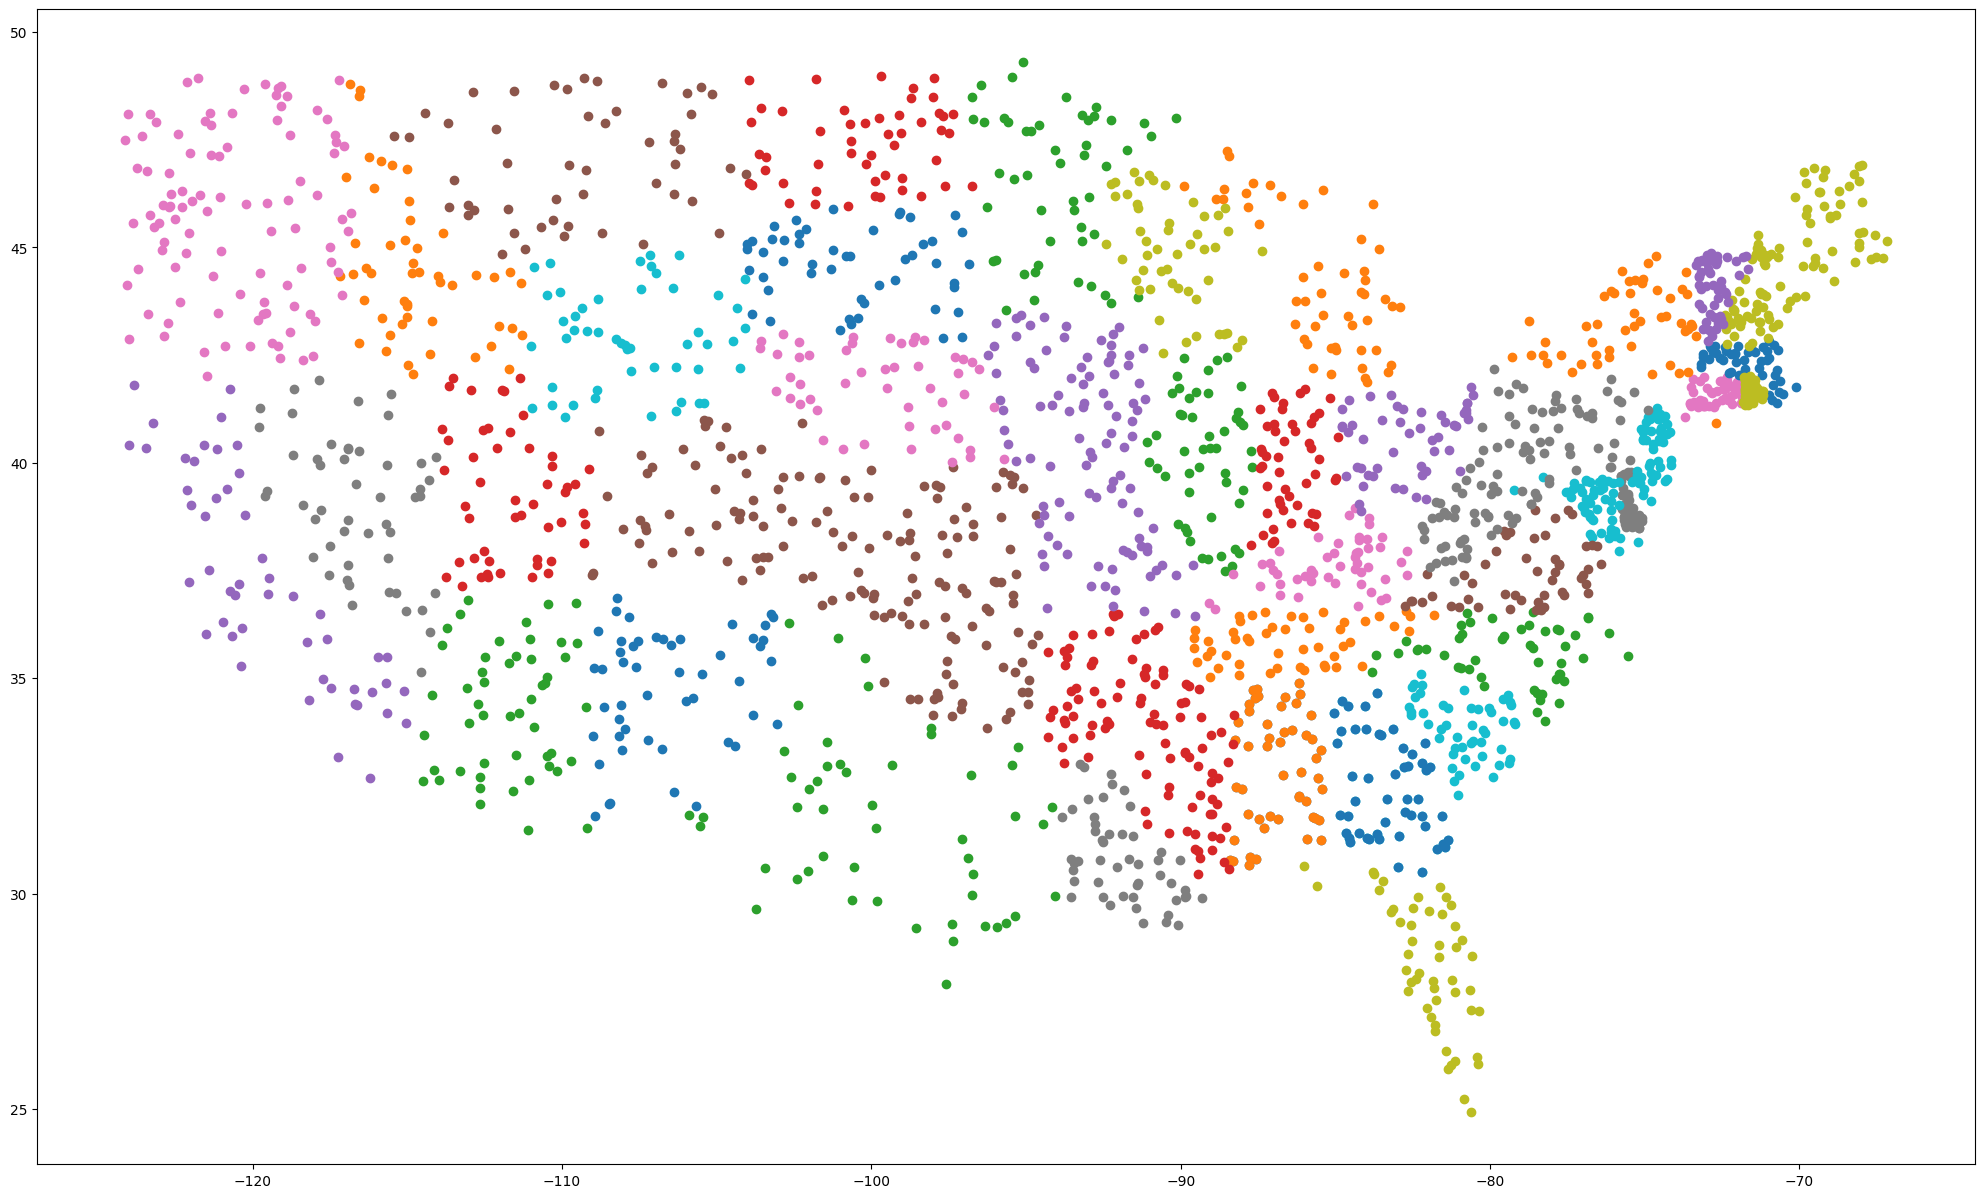

In [12]:
fig, ax = plt.subplots(figsize=(25,15))
for s in us_states:
    if s not in ['Alaska', 'Hawaii']:
        lat, lon = [], []
        for c in state_points[s]:
            if c[1] < 0:
                lat.append(c[0])
                lon.append(c[1])
    ax.scatter(lon, lat)
plt.show()

In [13]:
# Download https://www.dropbox.com/scl/fi/7dv71y3nxrcdrpmwntr8e/faces_aligned_small_mirrored_co_aligned_cropped_cleaned.tar.gz?rlkey=h03r92h1mdr9yet2tkqosqq1k&e=2&dl=0

In [14]:
import os
fdir = '/path/to/faces_aligned_small_mirrored_co_aligned_cropped_cleaned/F/'
mdir = '/path/to/faces_aligned_small_mirrored_co_aligned_cropped_cleaned/M/'
filenames, data = [], []
for gender, dir_ in zip(["Female", "Male"], [fdir, mdir]):
    for filename in os.listdir(dir_):
        fimage_list.append(dir_+filename)
        state = filename.split("_")[1].replace("-", " ")
        rand_coord = get_rand_coord(state)
        data.append({
            "year": int(filename[:4]),
            "state": state,
            "lat": rand_coord[0],
            "lon": rand_coord[1],
            "gender": gender
        })

In [ ]:
atlas.map_data(
    data=data,
    blobs=image_filenames,
    identifier="Hairstyles"
)

# Tiny Stories

In [1]:
from datasets import load_dataset

ds = load_dataset("roneneldan/TinyStories")

Generating train split:   0%|          | 0/2119719 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/21990 [00:00<?, ? examples/s]

In [14]:
atlas.map_data(
    data=pd.DataFrame(ds['train']),
    indexed_field="text",
    identifier="Tiny Stories"
)

2024-10-09 17:14:12.581 | WARNING  | nomic.atlas:map_data:128 - An ID field was not specified in your data so one was generated for you in insertion order.
2024-10-09 17:14:14.458 | INFO     | nomic.dataset:_create_project:857 - Creating dataset `tiny-stories`
2024-10-09 17:14:14.861 | INFO     | nomic.atlas:map_data:140 - Uploading data to Atlas.
424it [02:24,  2.93it/s]                         
2024-10-09 17:16:43.989 | INFO     | nomic.dataset:_add_data:1668 - Upload succeeded.
2024-10-09 17:16:44.102 | INFO     | nomic.atlas:map_data:158 - `nomic/tiny-stories`: Data upload succeeded to dataset`
2024-10-09 17:16:46.711 | INFO     | nomic.dataset:create_index:1262 - Created map `Tiny Stories` in dataset `nomic/tiny-stories`: https://atlas.nomic.ai/data/nomic/tiny-stories


AtlasDataset: <{'id': 'a22a2e6a-f0f1-48b4-adc5-14a943146c94', 'owner': '6e59bf43-f579-46ef-a144-ec130ce2652e', 'project_name': 'Tiny Stories', 'creator': 'google-oauth2|116194022103103208403', 'description': '', 'is_public': True, 'is_public_to_org': True, 'project_fields': ['text', 'id_'], 'unique_id_field': 'id_', 'modality': 'text', 'total_datums_in_project': 2119719, 'created_timestamp': '2024-10-09T21:14:14.079416+00:00', 'slug': 'tiny-stories', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/a22a2e6a-f0f1-48b4-adc5-14a943146c94/og-map.png', 'atlas_indices': [{'id': '5edd62b9-ab68-4c86-a8b1-a7aa50fbcda9', 'project_id': 'a22a2e6a-f0f1-48b4-adc5-14a943146c94', 'index_name': 'Tiny Stories', 'indexed_field': 'text', 'created_timestamp': '2024-10-09T21:16:45.471891+00:00', 'updated_timestamp': '2024-10-09T21:16:45.471891+00:00', 'atoms': ['charchunk', 'document'], 'colorable_fields': [], 'embedders': [{'id': 'ceed28f1-263b-49a2-be91-865c62f244c1', 'atlas_index_id': '5edd62b9-ab68-4c86-a8b1-a7aa50fbcda9', 'ready': False, 'model_name': 'nomic-embed-text-v1.5', 'hyperparameters': {'norm': 'both', 'batch_size': 20, 'polymerize_by': 'charchunk', 'dataset_buffer_size': 1000}}], 'nearest_neighbor_indices': [{'id': 'f90a5194-b1f3-4ac3-8884-c070d530672b', 'index_name': 'NomicOrganize', 'ready': False, 'hyperparameters': {'M': 16, 'space': 'l2', 'ef_construction': 100}, 'atom_strategies': ['document']}], 'projections': [{'id': 'ae7f4d58-c5a4-4bd1-a603-d85efbda42a6', 'projection_name': 'NomicProject', 'ready': False, 'hyperparameters': {'rho': 0.1, 'model': 'nomic-project-v2', 'spread': 1, 'n_noise': None, 'min_dist': 0.4, 'n_epochs': 50, 'n_neighbors': 15, 'n_init_epochs': 20, 'local_neighborhood_size': 64}, 'atom_strategies': ['document'], 'created_timestamp': '2024-10-09T21:16:45.488858+00:00', 'updated_timestamp': '2024-10-09T21:16:45.488858+00:00', 'thumbnail': 'https://atlas-content-production.s3.amazonaws.com/projects/a22a2e6a-f0f1-48b4-adc5-14a943146c94/ae7f4d58-c5a4-4bd1-a603-d85efbda42a6/map.png', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/a22a2e6a-f0f1-48b4-adc5-14a943146c94/ae7f4d58-c5a4-4bd1-a603-d85efbda42a6/og-map.png'}]}], 'insert_update_delete_lock': True, 'access_role': 'ADMIN', 'permissions': {'dataset:administration:read': True, 'dataset:administration:write': True, 'dataset:metadata:read': True, 'dataset:metadata:write': True, 'dataset:data:read': True, 'dataset:data:write': True, 'dataset:data:add': True, 'dataset:data:delete': True, 'dataset:resource:create': True, 'dataset:resource:delete': True, 'dataset:members:read': True, 'dataset:members:write': True, 'dataset:tags:read': True, 'dataset:tags:write': True}, 'schema': '//////gAAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAGAAAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAAA0AAAABAAAACQAAABhMjJhMmU2YS1mMGYxLTQ4YjQtYWRjNS0xNGE5NDMxNDZjOTQAAAAACgAAAHByb2plY3RfaWQAAAIAAAA8AAAABAAAANz///8AAAEFEAAAABQAAAAEAAAAAAAAAAMAAABpZF8AyP///xAAFAAIAAYABwAMAAAAEAAQAAAAAAABBRAAAAAcAAAABAAAAAAAAAAEAAAAdGV4dAAAAAAEAAQABAAAAA==', 'organization_slug': 'nomic', 'organization_name': 'Nomic', 'creator_nickname': 'max6', 'creator_picture': 'https://lh3.googleusercontent.com/a/ACg8ocJKxBMlt_PLxGbbQzq2Dk2EBTuhRW6eWCEFD6CrMR6hHjspEw=s96-c'}>

# GPT4All Retrieval benchmarks

## SciFact 

In [2]:
scifact_corpus_df = pd.read_json("hf://datasets/mteb/scifact/corpus.jsonl", lines=True)

In [8]:
scifact_corpus_df[['title', 'text']]

,title,text
0,Microstructural development of human newborn c...,Alterations of the architecture of cerebral wh...
1,Induction of myelodysplasia by myeloid-derived...,Myelodysplastic syndromes (MDS) are age-depend...
2,"BC1 RNA, the transcript from a master gene for...",ID elements are short interspersed elements (S...
3,The DNA Methylome of Human Peripheral Blood Mo...,DNA methylation plays an important role in bio...
4,The human myelin basic protein gene is include...,Two human Golli (for gene expressed in the oli...
...,...,...
5178,Body-mass index and cause-specific mortality i...,BACKGROUND The main associations of body-mass ...
5179,Targeting metabolic remodeling in glioblastoma...,A key aberrant biological difference between t...
5180,Signaling architectures that transmit unidirec...,A signaling pathway transmits information from...
5181,"Association between pre-diabetes, type 2 diabe...",AIMS Trabecular bone score (TBS) is a surrogat...


In [12]:
atlas.map_data(
    data=scifact_corpus_df[['title', 'text']],
    indexed_field="text",
    identifier="SciFact"
)

2024-10-10 13:30:47.599 | WARNING  | nomic.atlas:map_data:128 - An ID field was not specified in your data so one was generated for you in insertion order.
2024-10-10 13:30:49.930 | INFO     | nomic.dataset:_create_project:857 - Creating dataset `scifact`
2024-10-10 13:30:50.278 | INFO     | nomic.atlas:map_data:140 - Uploading data to Atlas.
2it [00:01,  1.41it/s]                       
2024-10-10 13:30:51.739 | INFO     | nomic.dataset:_add_data:1668 - Upload succeeded.
2024-10-10 13:30:51.742 | INFO     | nomic.atlas:map_data:158 - `nomic/scifact`: Data upload succeeded to dataset`
2024-10-10 13:30:53.156 | INFO     | nomic.dataset:create_index:1262 - Created map `SciFact` in dataset `nomic/scifact`: https://atlas.nomic.ai/data/nomic/scifact


AtlasDataset: <{'id': 'a9234708-eb39-4b82-8fa9-4ff0e335fe40', 'owner': '6e59bf43-f579-46ef-a144-ec130ce2652e', 'project_name': 'SciFact', 'creator': 'google-oauth2|116194022103103208403', 'description': '', 'is_public': True, 'is_public_to_org': True, 'project_fields': ['title', 'text', 'id_'], 'unique_id_field': 'id_', 'modality': 'text', 'total_datums_in_project': 5183, 'created_timestamp': '2024-10-10T17:30:49.664108+00:00', 'slug': 'scifact', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/a9234708-eb39-4b82-8fa9-4ff0e335fe40/og-map.png', 'atlas_indices': [{'id': '27af401b-e2f4-4eae-b991-3372483c6358', 'project_id': 'a9234708-eb39-4b82-8fa9-4ff0e335fe40', 'index_name': 'SciFact', 'indexed_field': 'text', 'created_timestamp': '2024-10-10T17:30:52.356957+00:00', 'updated_timestamp': '2024-10-10T17:30:52.356957+00:00', 'atoms': ['charchunk', 'document'], 'colorable_fields': ['title'], 'embedders': [{'id': 'f0666399-34c1-431b-b004-20bce908107d', 'atlas_index_id': '27af401b-e2f4-4eae-b991-3372483c6358', 'ready': False, 'model_name': 'nomic-embed-text-v1.5', 'hyperparameters': {'norm': 'both', 'batch_size': 20, 'polymerize_by': 'charchunk', 'dataset_buffer_size': 1000}}], 'nearest_neighbor_indices': [{'id': '9da5cecb-b59b-400f-a19d-98bcd7865237', 'index_name': 'NomicOrganize', 'ready': False, 'hyperparameters': {'M': 16, 'space': 'l2', 'ef_construction': 100}, 'atom_strategies': ['document']}], 'projections': [{'id': '82acefc7-6497-4fe2-a27a-946454a34714', 'projection_name': 'NomicProject', 'ready': False, 'hyperparameters': {'rho': 0.0, 'model': 'nomic-project-v2', 'spread': 1, 'n_noise': None, 'min_dist': 0.4, 'n_epochs': 50, 'n_neighbors': 10, 'n_init_epochs': 20, 'local_neighborhood_size': 15}, 'atom_strategies': ['document'], 'created_timestamp': '2024-10-10T17:30:52.376028+00:00', 'updated_timestamp': '2024-10-10T17:30:52.376028+00:00', 'thumbnail': 'https://atlas-content-production.s3.amazonaws.com/projects/a9234708-eb39-4b82-8fa9-4ff0e335fe40/82acefc7-6497-4fe2-a27a-946454a34714/map.png', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/a9234708-eb39-4b82-8fa9-4ff0e335fe40/82acefc7-6497-4fe2-a27a-946454a34714/og-map.png'}]}], 'insert_update_delete_lock': True, 'access_role': 'ADMIN', 'permissions': {'dataset:administration:read': True, 'dataset:administration:write': True, 'dataset:metadata:read': True, 'dataset:metadata:write': True, 'dataset:data:read': True, 'dataset:data:write': True, 'dataset:data:add': True, 'dataset:data:delete': True, 'dataset:resource:create': True, 'dataset:resource:delete': True, 'dataset:members:read': True, 'dataset:members:write': True, 'dataset:tags:read': True, 'dataset:tags:write': True}, 'schema': '/////ygBAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAGAAAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAAA0AAAABAAAACQAAABhOTIzNDcwOC1lYjM5LTRiODItOGZhOS00ZmYwZTMzNWZlNDAAAAAACgAAAHByb2plY3RfaWQAAAMAAABoAAAALAAAAAQAAAC0////AAABBRAAAAAUAAAABAAAAAAAAAADAAAAaWRfAKD////Y////AAABBRAAAAAYAAAABAAAAAAAAAAEAAAAdGV4dAAAAADI////EAAUAAgABgAHAAwAAAAQABAAAAAAAAEFEAAAABwAAAAEAAAAAAAAAAUAAAB0aXRsZQAAAAQABAAEAAAAAAAAAA==', 'organization_slug': 'nomic', 'organization_name': 'Nomic', 'creator_nickname': 'max6', 'creator_picture': 'https://lh3.googleusercontent.com/a/ACg8ocJKxBMlt_PLxGbbQzq2Dk2EBTuhRW6eWCEFD6CrMR6hHjspEw=s96-c'}>

## NFCorpus

In [13]:
nfcorpus = load_dataset("BeIR/nfcorpus", "corpus")

Generating corpus split:   0%|          | 0/3633 [00:00<?, ? examples/s]

In [26]:
nfcorpus_df = pd.DataFrame(nfcorpus['corpus'])

In [17]:
atlas.map_data(
    data=nfcorpus_df[['title', 'text']],
    indexed_field="text",
    identifier="NFCorpus"
)

2024-10-10 13:33:39.318 | WARNING  | nomic.atlas:map_data:128 - An ID field was not specified in your data so one was generated for you in insertion order.
2024-10-10 13:33:41.523 | INFO     | nomic.dataset:_create_project:857 - Creating dataset `nfcorpus`
2024-10-10 13:33:41.901 | INFO     | nomic.atlas:map_data:140 - Uploading data to Atlas.
1it [00:02,  2.35s/it]
2024-10-10 13:33:44.267 | INFO     | nomic.dataset:_add_data:1668 - Upload succeeded.
2024-10-10 13:33:44.272 | INFO     | nomic.atlas:map_data:158 - `nomic/nfcorpus`: Data upload succeeded to dataset`
2024-10-10 13:33:45.643 | INFO     | nomic.dataset:create_index:1262 - Created map `NFCorpus` in dataset `nomic/nfcorpus`: https://atlas.nomic.ai/data/nomic/nfcorpus


AtlasDataset: <{'id': '5e8c9135-e827-4221-924b-e61fce793050', 'owner': '6e59bf43-f579-46ef-a144-ec130ce2652e', 'project_name': 'NFCorpus', 'creator': 'google-oauth2|116194022103103208403', 'description': '', 'is_public': True, 'is_public_to_org': True, 'project_fields': ['title', 'text', 'id_'], 'unique_id_field': 'id_', 'modality': 'text', 'total_datums_in_project': 3633, 'created_timestamp': '2024-10-10T17:33:41.112044+00:00', 'slug': 'nfcorpus', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/5e8c9135-e827-4221-924b-e61fce793050/og-map.png', 'atlas_indices': [{'id': 'adfbf4be-66e5-4a82-93fa-e8b40de734f2', 'project_id': '5e8c9135-e827-4221-924b-e61fce793050', 'index_name': 'NFCorpus', 'indexed_field': 'text', 'created_timestamp': '2024-10-10T17:33:44.843313+00:00', 'updated_timestamp': '2024-10-10T17:33:44.843313+00:00', 'atoms': ['charchunk', 'document'], 'colorable_fields': ['title'], 'embedders': [{'id': 'bea74c31-6159-4ea9-a359-2387e16e3c0f', 'atlas_index_id': 'adfbf4be-66e5-4a82-93fa-e8b40de734f2', 'ready': False, 'model_name': 'nomic-embed-text-v1.5', 'hyperparameters': {'norm': 'both', 'batch_size': 20, 'polymerize_by': 'charchunk', 'dataset_buffer_size': 1000}}], 'nearest_neighbor_indices': [{'id': 'c88ab717-9c5d-41cb-bdb1-95ad7c768e61', 'index_name': 'NomicOrganize', 'ready': False, 'hyperparameters': {'M': 16, 'space': 'l2', 'ef_construction': 100}, 'atom_strategies': ['document']}], 'projections': [{'id': 'd27367ae-dbd4-4769-a2af-ef11698ec7d5', 'projection_name': 'NomicProject', 'ready': False, 'hyperparameters': {'rho': 0.0, 'model': 'nomic-project-v2', 'spread': 1, 'n_noise': None, 'min_dist': 0.4, 'n_epochs': 50, 'n_neighbors': 5, 'n_init_epochs': 20, 'local_neighborhood_size': 15}, 'atom_strategies': ['document'], 'created_timestamp': '2024-10-10T17:33:44.862277+00:00', 'updated_timestamp': '2024-10-10T17:33:44.862277+00:00', 'thumbnail': 'https://atlas-content-production.s3.amazonaws.com/projects/5e8c9135-e827-4221-924b-e61fce793050/d27367ae-dbd4-4769-a2af-ef11698ec7d5/map.png', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/5e8c9135-e827-4221-924b-e61fce793050/d27367ae-dbd4-4769-a2af-ef11698ec7d5/og-map.png'}]}], 'insert_update_delete_lock': True, 'access_role': 'ADMIN', 'permissions': {'dataset:administration:read': True, 'dataset:administration:write': True, 'dataset:metadata:read': True, 'dataset:metadata:write': True, 'dataset:data:read': True, 'dataset:data:write': True, 'dataset:data:add': True, 'dataset:data:delete': True, 'dataset:resource:create': True, 'dataset:resource:delete': True, 'dataset:members:read': True, 'dataset:members:write': True, 'dataset:tags:read': True, 'dataset:tags:write': True}, 'schema': '/////ygBAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAGAAAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAAA0AAAABAAAACQAAAA1ZThjOTEzNS1lODI3LTQyMjEtOTI0Yi1lNjFmY2U3OTMwNTAAAAAACgAAAHByb2plY3RfaWQAAAMAAABoAAAALAAAAAQAAAC0////AAABBRAAAAAUAAAABAAAAAAAAAADAAAAaWRfAKD////Y////AAABBRAAAAAYAAAABAAAAAAAAAAEAAAAdGV4dAAAAADI////EAAUAAgABgAHAAwAAAAQABAAAAAAAAEFEAAAABwAAAAEAAAAAAAAAAUAAAB0aXRsZQAAAAQABAAEAAAAAAAAAA==', 'organization_slug': 'nomic', 'organization_name': 'Nomic', 'creator_nickname': 'max6', 'creator_picture': 'https://lh3.googleusercontent.com/a/ACg8ocJKxBMlt_PLxGbbQzq2Dk2EBTuhRW6eWCEFD6CrMR6hHjspEw=s96-c'}>

## FiQA

In [18]:
fiqa = load_dataset("BeIR/fiqa", "corpus")

Generating corpus split:   0%|          | 0/57638 [00:00<?, ? examples/s]

In [27]:
fiqa_df = pd.DataFrame(fiqa['corpus'])

In [22]:
atlas.map_data(
    data=fiqa_df[['text']],
    indexed_field="text",
    identifier="FiQA"
)

2024-10-10 13:39:19.971 | WARNING  | nomic.atlas:map_data:128 - An ID field was not specified in your data so one was generated for you in insertion order.
2024-10-10 13:39:22.273 | INFO     | nomic.dataset:_create_project:857 - Creating dataset `fiqa`
2024-10-10 13:39:22.659 | INFO     | nomic.atlas:map_data:140 - Uploading data to Atlas.
12it [00:04,  2.51it/s]                        
2024-10-10 13:39:27.536 | INFO     | nomic.dataset:_add_data:1668 - Upload succeeded.
2024-10-10 13:39:27.542 | INFO     | nomic.atlas:map_data:158 - `nomic/fiqa`: Data upload succeeded to dataset`
2024-10-10 13:39:29.353 | INFO     | nomic.dataset:create_index:1262 - Created map `FiQA` in dataset `nomic/fiqa`: https://atlas.nomic.ai/data/nomic/fiqa


AtlasDataset: <{'id': 'ff933cb3-37a7-41d0-b56f-f55fe3be98e1', 'owner': '6e59bf43-f579-46ef-a144-ec130ce2652e', 'project_name': 'FiQA', 'creator': 'google-oauth2|116194022103103208403', 'description': '', 'is_public': True, 'is_public_to_org': True, 'project_fields': ['text', 'id_'], 'unique_id_field': 'id_', 'modality': 'text', 'total_datums_in_project': 57638, 'created_timestamp': '2024-10-10T17:39:21.976138+00:00', 'slug': 'fiqa', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/ff933cb3-37a7-41d0-b56f-f55fe3be98e1/og-map.png', 'atlas_indices': [{'id': 'a908b3ce-2b8a-45be-8c24-2272e46fbe82', 'project_id': 'ff933cb3-37a7-41d0-b56f-f55fe3be98e1', 'index_name': 'FiQA', 'indexed_field': 'text', 'created_timestamp': '2024-10-10T17:39:28.565217+00:00', 'updated_timestamp': '2024-10-10T17:39:28.565217+00:00', 'atoms': ['charchunk', 'document'], 'colorable_fields': [], 'embedders': [{'id': '15f93a13-14b1-4acc-986b-b308383cb2b5', 'atlas_index_id': 'a908b3ce-2b8a-45be-8c24-2272e46fbe82', 'ready': False, 'model_name': 'nomic-embed-text-v1.5', 'hyperparameters': {'norm': 'both', 'batch_size': 20, 'polymerize_by': 'charchunk', 'dataset_buffer_size': 1000}}], 'nearest_neighbor_indices': [{'id': '4c2ec829-f598-4915-87a2-d90f868a7137', 'index_name': 'NomicOrganize', 'ready': False, 'hyperparameters': {'M': 16, 'space': 'l2', 'ef_construction': 100}, 'atom_strategies': ['document']}], 'projections': [{'id': '78788d1d-153b-4566-8f8e-b833ecff3228', 'projection_name': 'NomicProject', 'ready': False, 'hyperparameters': {'rho': 0.1, 'model': 'nomic-project-v2', 'spread': 1, 'n_noise': None, 'min_dist': 0.4, 'n_epochs': 50, 'n_neighbors': 15, 'n_init_epochs': 20, 'local_neighborhood_size': 64}, 'atom_strategies': ['document'], 'created_timestamp': '2024-10-10T17:39:28.587794+00:00', 'updated_timestamp': '2024-10-10T17:39:28.587794+00:00', 'thumbnail': 'https://atlas-content-production.s3.amazonaws.com/projects/ff933cb3-37a7-41d0-b56f-f55fe3be98e1/78788d1d-153b-4566-8f8e-b833ecff3228/map.png', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/ff933cb3-37a7-41d0-b56f-f55fe3be98e1/78788d1d-153b-4566-8f8e-b833ecff3228/og-map.png'}]}], 'insert_update_delete_lock': True, 'access_role': 'ADMIN', 'permissions': {'dataset:administration:read': True, 'dataset:administration:write': True, 'dataset:metadata:read': True, 'dataset:metadata:write': True, 'dataset:data:read': True, 'dataset:data:write': True, 'dataset:data:add': True, 'dataset:data:delete': True, 'dataset:resource:create': True, 'dataset:resource:delete': True, 'dataset:members:read': True, 'dataset:members:write': True, 'dataset:tags:read': True, 'dataset:tags:write': True}, 'schema': '//////gAAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAGAAAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAAA0AAAABAAAACQAAABmZjkzM2NiMy0zN2E3LTQxZDAtYjU2Zi1mNTVmZTNiZTk4ZTEAAAAACgAAAHByb2plY3RfaWQAAAIAAAA8AAAABAAAANz///8AAAEFEAAAABQAAAAEAAAAAAAAAAMAAABpZF8AyP///xAAFAAIAAYABwAMAAAAEAAQAAAAAAABBRAAAAAcAAAABAAAAAAAAAAEAAAAdGV4dAAAAAAEAAQABAAAAA==', 'organization_slug': 'nomic', 'organization_name': 'Nomic', 'creator_nickname': 'max6', 'creator_picture': 'https://lh3.googleusercontent.com/a/ACg8ocJKxBMlt_PLxGbbQzq2Dk2EBTuhRW6eWCEFD6CrMR6hHjspEw=s96-c'}>

# TREC-COVID

In [29]:
trec_covid = load_dataset("BeIR/trec-covid", "corpus")

In [30]:
trec_covid_df = pd.DataFrame(trec_covid['corpus'])

In [25]:
atlas.map_data(
    data=pd.DataFrame(trec_covid_df['corpus'])[['title', 'text']],
    indexed_field="text",
    identifier="TREC-COVID"
)

2024-10-10 13:43:28.340 | WARNING  | nomic.atlas:map_data:128 - An ID field was not specified in your data so one was generated for you in insertion order.
2024-10-10 13:43:30.335 | INFO     | nomic.dataset:_create_project:857 - Creating dataset `trec-covid`
2024-10-10 13:43:30.886 | INFO     | nomic.atlas:map_data:140 - Uploading data to Atlas.
35it [00:15,  2.22it/s]                        
2024-10-10 13:43:46.906 | INFO     | nomic.dataset:_add_data:1668 - Upload succeeded.
2024-10-10 13:43:46.927 | INFO     | nomic.atlas:map_data:158 - `nomic/trec-covid`: Data upload succeeded to dataset`
2024-10-10 13:43:48.760 | INFO     | nomic.dataset:create_index:1262 - Created map `TREC-COVID` in dataset `nomic/trec-covid`: https://atlas.nomic.ai/data/nomic/trec-covid


AtlasDataset: <{'id': 'ceab865c-9eb4-40c5-9a03-934bf0ab3001', 'owner': '6e59bf43-f579-46ef-a144-ec130ce2652e', 'project_name': 'TREC-COVID', 'creator': 'google-oauth2|116194022103103208403', 'description': '', 'is_public': True, 'is_public_to_org': True, 'project_fields': ['title', 'text', 'id_'], 'unique_id_field': 'id_', 'modality': 'text', 'total_datums_in_project': 171332, 'created_timestamp': '2024-10-10T17:43:29.972561+00:00', 'slug': 'trec-covid', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/ceab865c-9eb4-40c5-9a03-934bf0ab3001/og-map.png', 'atlas_indices': [{'id': '342ce6fa-004f-4629-bea4-bab366802007', 'project_id': 'ceab865c-9eb4-40c5-9a03-934bf0ab3001', 'index_name': 'TREC-COVID', 'indexed_field': 'text', 'created_timestamp': '2024-10-10T17:43:47.777931+00:00', 'updated_timestamp': '2024-10-10T17:43:47.777931+00:00', 'atoms': ['charchunk', 'document'], 'colorable_fields': ['title'], 'embedders': [{'id': 'dab13967-4b32-458e-b660-f6d57b76230a', 'atlas_index_id': '342ce6fa-004f-4629-bea4-bab366802007', 'ready': False, 'model_name': 'nomic-embed-text-v1.5', 'hyperparameters': {'norm': 'both', 'batch_size': 20, 'polymerize_by': 'charchunk', 'dataset_buffer_size': 1000}}], 'nearest_neighbor_indices': [{'id': '87df3a3d-bcfc-4db1-89ac-f9e2d36b45d2', 'index_name': 'NomicOrganize', 'ready': False, 'hyperparameters': {'M': 16, 'space': 'l2', 'ef_construction': 100}, 'atom_strategies': ['document']}], 'projections': [{'id': 'e38b023e-b931-474e-8ad1-216b3abf5b7e', 'projection_name': 'NomicProject', 'ready': False, 'hyperparameters': {'rho': 0.1, 'model': 'nomic-project-v2', 'spread': 1, 'n_noise': None, 'min_dist': 0.4, 'n_epochs': 50, 'n_neighbors': 15, 'n_init_epochs': 20, 'local_neighborhood_size': 64}, 'atom_strategies': ['document'], 'created_timestamp': '2024-10-10T17:43:47.803353+00:00', 'updated_timestamp': '2024-10-10T17:43:47.803353+00:00', 'thumbnail': 'https://atlas-content-production.s3.amazonaws.com/projects/ceab865c-9eb4-40c5-9a03-934bf0ab3001/e38b023e-b931-474e-8ad1-216b3abf5b7e/map.png', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/ceab865c-9eb4-40c5-9a03-934bf0ab3001/e38b023e-b931-474e-8ad1-216b3abf5b7e/og-map.png'}]}], 'insert_update_delete_lock': True, 'access_role': 'ADMIN', 'permissions': {'dataset:administration:read': True, 'dataset:administration:write': True, 'dataset:metadata:read': True, 'dataset:metadata:write': True, 'dataset:data:read': True, 'dataset:data:write': True, 'dataset:data:add': True, 'dataset:data:delete': True, 'dataset:resource:create': True, 'dataset:resource:delete': True, 'dataset:members:read': True, 'dataset:members:write': True, 'dataset:tags:read': True, 'dataset:tags:write': True}, 'schema': '/////ygBAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAGAAAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAAA0AAAABAAAACQAAABjZWFiODY1Yy05ZWI0LTQwYzUtOWEwMy05MzRiZjBhYjMwMDEAAAAACgAAAHByb2plY3RfaWQAAAMAAABoAAAALAAAAAQAAAC0////AAABBRAAAAAUAAAABAAAAAAAAAADAAAAaWRfAKD////Y////AAABBRAAAAAYAAAABAAAAAAAAAAEAAAAdGV4dAAAAADI////EAAUAAgABgAHAAwAAAAQABAAAAAAAAEFEAAAABwAAAAEAAAAAAAAAAUAAAB0aXRsZQAAAAQABAAEAAAAAAAAAA==', 'organization_slug': 'nomic', 'organization_name': 'Nomic', 'creator_nickname': 'max6', 'creator_picture': 'https://lh3.googleusercontent.com/a/ACg8ocJKxBMlt_PLxGbbQzq2Dk2EBTuhRW6eWCEFD6CrMR6hHjspEw=s96-c'}>

# Combined dataset of all 4 benchmark datasets

In [31]:
# Create a list to store the combined dataframes
combined_dfs = []

# Add scifact dataframe
scifact_corpus_df['dataset'] = 'scifact'
combined_dfs.append(scifact_corpus_df[['title', 'text', 'dataset']])

# Add nfcorpus dataframe
nfcorpus_df['dataset'] = 'nfcorpus'
combined_dfs.append(nfcorpus_df[['title', 'text', 'dataset']])

# Add fiqa dataframe
fiqa_df['dataset'] = 'fiqa'
fiqa_df['title'] = ''  # FiQA doesn't have a title, so we'll add an empty string
combined_dfs.append(fiqa_df[['title', 'text', 'dataset']])

# Add trec-covid dataframe
trec_covid_df['dataset'] = 'trec-covid'
combined_dfs.append(trec_covid_df[['title', 'text', 'dataset']])

# Concatenate all dataframes
combined_df = pd.concat(combined_dfs, ignore_index=True)


In [43]:
import pyarrow as pa

pa.concat_tables([*map(pa.table, [scifact_corpus_df, fiqa_df, trec_covid_df])])

ArrowInvalid: Schema at index 1 was different: 
_id: int64
title: string
text: string
dataset: string
vs
_id: string
title: string
text: string
dataset: string

In [36]:
combined_df

,title,text,dataset
0,Microstructural development of human newborn c...,Alterations of the architecture of cerebral wh...,scifact
1,Induction of myelodysplasia by myeloid-derived...,Myelodysplastic syndromes (MDS) are age-depend...,scifact
2,"BC1 RNA, the transcript from a master gene for...",ID elements are short interspersed elements (S...,scifact
3,The DNA Methylome of Human Peripheral Blood Mo...,DNA methylation plays an important role in bio...,scifact
4,The human myelin basic protein gene is include...,Two human Golli (for gene expressed in the oli...,scifact
...,...,...,...
237781,Can Pediatric COVID-19 Testing Sensitivity Be ...,,trec-covid
237782,Heterogeneity and plasticity of porcine alveol...,This study investigated the heterogeneity and ...,trec-covid
237783,SARS E protein in phospholipid bilayers: an an...,Abstract We report on an anomalous X-ray refle...,trec-covid
237784,Italian Society of Interventional Cardiology (...,COVID‐19 pandemic raised the issue to guarante...,trec-covid


In [37]:
atlas.map_data(
    data=combined_df,
    indexed_field="text",
    identifier="GPT4All Retrieval Eval Data"
)

2024-10-10 13:55:32.090 | WARNING  | nomic.atlas:map_data:128 - An ID field was not specified in your data so one was generated for you in insertion order.
2024-10-10 13:55:33.872 | INFO     | nomic.dataset:_create_project:857 - Creating dataset `gpt4all-retrieval-eval-data`
2024-10-10 13:55:34.203 | INFO     | nomic.atlas:map_data:140 - Uploading data to Atlas.
48it [00:20,  2.40it/s]                        
2024-10-10 13:55:54.499 | INFO     | nomic.dataset:_add_data:1668 - Upload succeeded.
2024-10-10 13:55:54.511 | INFO     | nomic.atlas:map_data:158 - `nomic/gpt4all-retrieval-eval-data`: Data upload succeeded to dataset`
2024-10-10 13:55:56.068 | INFO     | nomic.dataset:create_index:1262 - Created map `GPT4All Retrieval Eval Data` in dataset `nomic/gpt4all-retrieval-eval-data`: https://atlas.nomic.ai/data/nomic/gpt4all-retrieval-eval-data


AtlasDataset: <{'id': '0ceda6ee-c268-4ad2-abf9-773ffa2ddd21', 'owner': '6e59bf43-f579-46ef-a144-ec130ce2652e', 'project_name': 'GPT4All Retrieval Eval Data', 'creator': 'google-oauth2|116194022103103208403', 'description': '', 'is_public': True, 'is_public_to_org': True, 'project_fields': ['title', 'text', 'dataset', 'id_'], 'unique_id_field': 'id_', 'modality': 'text', 'total_datums_in_project': 237786, 'created_timestamp': '2024-10-10T17:55:33.561159+00:00', 'slug': 'gpt4all-retrieval-eval-data', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/0ceda6ee-c268-4ad2-abf9-773ffa2ddd21/og-map.png', 'atlas_indices': [{'id': 'c661b27f-2e6f-4ba6-a065-65c8e9b0a1e4', 'project_id': '0ceda6ee-c268-4ad2-abf9-773ffa2ddd21', 'index_name': 'GPT4All Retrieval Eval Data', 'indexed_field': 'text', 'created_timestamp': '2024-10-10T17:55:55.241917+00:00', 'updated_timestamp': '2024-10-10T17:55:55.241917+00:00', 'atoms': ['charchunk', 'document'], 'colorable_fields': ['title', 'dataset'], 'embedders': [{'id': 'a7bad58b-fe5f-44db-8213-7bf1843f6592', 'atlas_index_id': 'c661b27f-2e6f-4ba6-a065-65c8e9b0a1e4', 'ready': False, 'model_name': 'nomic-embed-text-v1.5', 'hyperparameters': {'norm': 'both', 'batch_size': 20, 'polymerize_by': 'charchunk', 'dataset_buffer_size': 1000}}], 'nearest_neighbor_indices': [{'id': 'e7bfe14f-14c6-4bf8-bea1-34a8ffdada38', 'index_name': 'NomicOrganize', 'ready': False, 'hyperparameters': {'M': 16, 'space': 'l2', 'ef_construction': 100}, 'atom_strategies': ['document']}], 'projections': [{'id': 'abdc1208-2d58-4a1e-8636-85713e0109f6', 'projection_name': 'NomicProject', 'ready': False, 'hyperparameters': {'rho': 0.1, 'model': 'nomic-project-v2', 'spread': 1, 'n_noise': None, 'min_dist': 0.4, 'n_epochs': 50, 'n_neighbors': 15, 'n_init_epochs': 20, 'local_neighborhood_size': 64}, 'atom_strategies': ['document'], 'created_timestamp': '2024-10-10T17:55:55.264881+00:00', 'updated_timestamp': '2024-10-10T17:55:55.264881+00:00', 'thumbnail': 'https://atlas-content-production.s3.amazonaws.com/projects/0ceda6ee-c268-4ad2-abf9-773ffa2ddd21/abdc1208-2d58-4a1e-8636-85713e0109f6/map.png', 'og_image': 'https://atlas-content-production.s3.amazonaws.com/projects/0ceda6ee-c268-4ad2-abf9-773ffa2ddd21/abdc1208-2d58-4a1e-8636-85713e0109f6/og-map.png'}]}], 'insert_update_delete_lock': True, 'access_role': 'ADMIN', 'permissions': {'dataset:administration:read': True, 'dataset:administration:write': True, 'dataset:metadata:read': True, 'dataset:metadata:write': True, 'dataset:data:read': True, 'dataset:data:write': True, 'dataset:data:add': True, 'dataset:data:delete': True, 'dataset:resource:create': True, 'dataset:resource:delete': True, 'dataset:members:read': True, 'dataset:members:write': True, 'dataset:tags:read': True, 'dataset:tags:write': True}, 'schema': '/////1ABAAAQAAAAAAAKAA4ABgAFAAgACgAAAAABBAAQAAAAAAAKAAwAAAAEAAgACgAAAGAAAAAEAAAAAQAAAAwAAAAIAAwABAAIAAgAAAA0AAAABAAAACQAAAAwY2VkYTZlZS1jMjY4LTRhZDItYWJmOS03NzNmZmEyZGRkMjEAAAAACgAAAHByb2plY3RfaWQAAAQAAACUAAAAWAAAACwAAAAEAAAAjP///wAAAQUQAAAAFAAAAAQAAAAAAAAAAwAAAGlkXwB4////sP///wAAAQUQAAAAGAAAAAQAAAAAAAAABwAAAGRhdGFzZXQAoP///9j///8AAAEFEAAAABgAAAAEAAAAAAAAAAQAAAB0ZXh0AAAAAMj///8QABQACAAGAAcADAAAABAAEAAAAAAAAQUQAAAAHAAAAAQAAAAAAAAABQAAAHRpdGxlAAAABAAEAAQAAAA=', 'organization_slug': 'nomic', 'organization_name': 'Nomic', 'creator_nickname': 'max6', 'creator_picture': 'https://lh3.googleusercontent.com/a/ACg8ocJKxBMlt_PLxGbbQzq2Dk2EBTuhRW6eWCEFD6CrMR6hHjspEw=s96-c'}>